In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as plt
%matplotlib inline

df = pd.read_csv("BankLoanApproval.csv")
df.head()


# Mapping the categorical to numerical 
# Selecting variables 
# Dropped the LoanID
# Define the mappings
education_mapping = {'High School': 0, "Bachelor's": 1, "Master's": 2, 'PhD': 3}
employment_mapping = {'Unemployed': 0, 'Part-time': 1, 'Full-time': 2, 'Self-employed': 3}
marital_mapping = {'Single': 0, 'Married': 1, 'Divorced': 2}
mortgage_mapping = {'Yes': 1, 'No': 0}
dependent_mapping ={'Yes': 1, 'No':0}
loan_mapping ={'Education':0, 'Auto':1, 'Home':2, 'Other':3, 'Business':4}
cosigner_mapping={'Yes': 1, 'No':0}

# Select the specified columns
selected_columns = df[["Age", "Income", "LoanAmount", "CreditScore","MonthsEmployed","NumCreditLines","InterestRate","LoanTerm","DTIRatio", 
                       "Education", "EmploymentType", "MaritalStatus", 
                       "HasMortgage","HasDependents","LoanPurpose","HasCoSigner","Default"]]

# Map the education column
selected_columns['Education'] = selected_columns['Education'].map(education_mapping)

# Map the employment column
selected_columns['EmploymentType'] = selected_columns['EmploymentType'].map(employment_mapping)

# Map the marital status column
selected_columns['MaritalStatus'] = selected_columns['MaritalStatus'].map(marital_mapping)

# Map the HasMortgage column
selected_columns['HasMortgage'] = selected_columns['HasMortgage'].map(mortgage_mapping)

selected_columns['HasDependents'] = selected_columns['HasDependents'].map(dependent_mapping)

selected_columns['LoanPurpose'] = selected_columns['LoanPurpose'].map(loan_mapping)

selected_columns['HasCoSigner'] = selected_columns['HasCoSigner'].map(cosigner_mapping)

df =selected_columns
df.head()

C:\Users\cheng\AppData\Local\Temp\ipykernel_4880\816950091.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Education'] = selected_columns['Education'].map(education_mapping)
C:\Users\cheng\AppData\Local\Temp\ipykernel_4880\816950091.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['EmploymentType'] = selected_columns['EmploymentType'].map(employment_mapping)
C:\Users\cheng\AppData\Local\Temp\ipykernel_4880\816950091.py:36: SettingWithCopyWarning: 
A value is tryin

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,28,140466,163781,652,94,2,9.08,48,0.23,0,0,1,0,0,0,0,0
1,28,149227,139759,375,56,3,5.84,36,0.80,3,2,2,0,0,0,1,1
2,41,23265,63527,829,87,4,9.73,60,0.45,2,2,2,1,0,1,1,0
3,53,117550,95744,395,112,4,3.58,24,0.73,0,0,0,0,0,1,1,0
4,57,139699,88143,635,112,4,5.63,48,0.20,2,1,2,0,0,2,0,0


In [4]:
from sklearn.model_selection import train_test_split 
  
X = df.drop(['Default'],axis=1) 
Y = df['Default'] 
X.shape,Y.shape 
  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.3, 
                                                    random_state=42) 
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((178728, 16), (76599, 16), (178728,), (76599,))

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import xgboost as xgb

# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model with the training data
grid_search.fit(X_train, Y_train)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the optimized Random Forest Classifier
optimized_rf_classifier = RandomForestClassifier(random_state=42, **best_params)

# Fit the optimized model on the training data
optimized_rf_classifier.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = optimized_rf_classifier.predict(X_test)

# Calculate confusion matrix
con = confusion_matrix(Y_test, y_pred)
lab = ["Not Approved", "Approved"]

# Display confusion matrix
dis = ConfusionMatrixDisplay(con, display_labels=lab)
dis.plot()

# Print classification report
print("Classification Report:")
print(classification_report(Y_test, y_pred))


KeyboardInterrupt: 

Number of components selected by PCA: 16
Classification Report after PCA:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67658
           1       0.61      0.02      0.04      8941

    accuracy                           0.88     76599
   macro avg       0.75      0.51      0.49     76599
weighted avg       0.85      0.88      0.83     76599



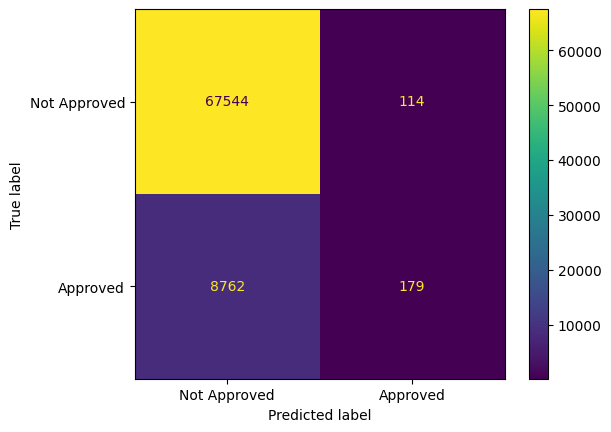

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to the standardized features
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print the number of components selected by PCA
print("Number of components selected by PCA:", pca.n_components_)

# Now, use the reduced dimensionality features for training
# For example, you can retrain your Random Forest Classifier with the reduced dimensionality features
rf_classifier.fit(X_train_pca, Y_train)

# Make predictions on the reduced dimensionality test set
y_pred_pca = rf_classifier.predict(X_test_pca)

# Calculate confusion matrix
con_pca = confusion_matrix(Y_test, y_pred_pca)

# Display confusion matrix
lab = ["Not Approved", "Approved"]
dis_pca = ConfusionMatrixDisplay(con_pca, display_labels=lab)
dis_pca.plot()

# Print classification report
print("Classification Report after PCA:")
print(classification_report(Y_test, y_pred_pca))
